<a href="https://colab.research.google.com/github/shahidzk1/Numerical_analysis/blob/shahid_version/Exponential_decay_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In experimental physics generally detector data is receieved from a detector which measures some quantity e.g. charge depositied on a cathode plate in a gas chamber detector. The data of the measurement is saved and later analyzed to find hidden physics. Here we will simulate nuclei decay and their data received by a detector. Nuclei number N of a radioactive sample is $N= N_{i}e^{-\lambda t}$, with $N_{i}$ as the initial nuclei number, $\lambda$ as the disintegration constat and t as time. Then we will analyze the data by using single variable linear-regression and calculate the half life of the nuclei. From this then one can estimate the nuclei species.

In [1]:
#importing python libraries
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar

Let's have an exponentially decaying nuclei. Since decay is a quantum mechanical process, so some nuclei will decay with one mean lifetime while others with other. To simulate them we take the independent time variable as t and make an exponentially decaying function y.  We take the detector and atmospheric noise as a combined source in the form of noise. Add the noise to the signal i.e. y and create data.

In [2]:
def data_simulator(t_i, t_f, N_i, noise_sigma, lambda_):
    t = np.arange(t_i,t_f,1) #time
    N = N_i*np.exp(-lambda_*t)
    noise_mean = 0
    noise = np.random.normal(0,noise_sigma, len(N))
    z = N+noise
    data = np.abs(z) #signal cannot be negative so we remove negative values
    return t, N, noise, data

In [3]:
t_i = 0
t_f = 400
N_i= 150
noise_sigma = 15
lambda_ = 0.005
t12_i = np.log(2)/lambda_# since t1/2 = ln(2)/ lambda so t1/2 is 138.62943611198907
t, N, noise, data = data_simulator (t_i, t_f, N_i, noise_sigma, lambda_)

(array([ 4., 13., 33., 66., 66., 89., 75., 33., 16.,  5.]),
 array([-40.64579921, -32.92547482, -25.20515042, -17.48482602,
         -9.76450163,  -2.04417723,   5.67614717,  13.39647156,
         21.11679596,  28.83712036,  36.55744475]),
 <BarContainer object of 10 artists>)

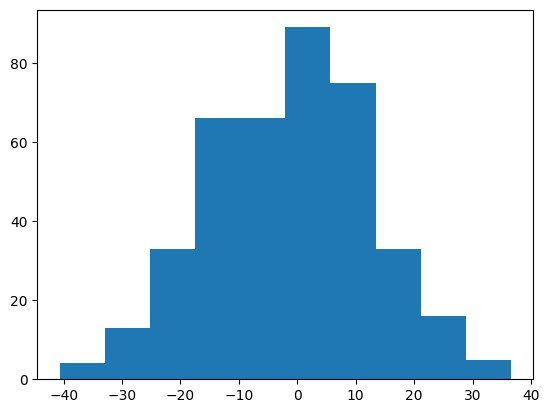

In [4]:
#plotting the noise
plt.hist(noise)

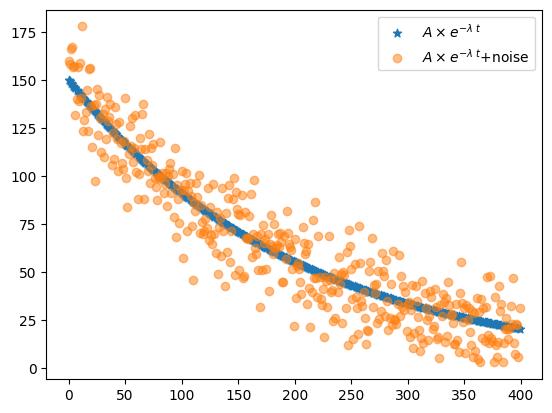

In [5]:
plt.scatter(t,N, marker='*', label=r'$A \times e^{- \lambda\ t}$')
plt.scatter(t,data, alpha = 0.5, label=r'$A \times e^{- \lambda\ t}$+noise')
plt.legend()

# Fitting Routine
Here we will plot the data and analyze it using a sinle variable linear-regression.

In [6]:
#we define the total fit function
def exp1(x,A,B):
  return A*np.exp(-B*x)


#p0 is the intialization parameters of the fit function and we will initialize them with the parameters we get from the histogram
popt,pcov = param_optimised,param_covariance_matrix = curve_fit(exp1,t,data,p0=[100,0.05],maxfev=5000)
#The diagonals of pcov provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
perr = np.sqrt(np.diag(pcov))

In [7]:
print("The values of the parameters",popt)
print("erorrs of the parameters",perr)

The values of the parameters [1.52028622e+02 5.21014248e-03]
erorrs of the parameters [2.11877866e+00 1.15314879e-04]


## Characterization of the fitting routine
The criteria to characterize the fitting the $\chi^{2}_{red}$ will be used. It is calculated as $\chi^{2}_{red} = (\sum_{i}\frac{(data_i - fit_i)^2}{fit_i^{2}})/NDF$. Where NDF is the number of degrees of freedom i.e. (n observations - m fitting parameters).

In [8]:
#chi2 calculation
chi2= ((data-exp1(t,*popt))**2)/(exp1(t,*popt))**2

#reduced chi2 is chi2/NDF
red_chi2 = (sum(chi2) )/(len(t)-2)
red_chi2

0.11388052604650432

Text(0, 0.5, 'Counts')

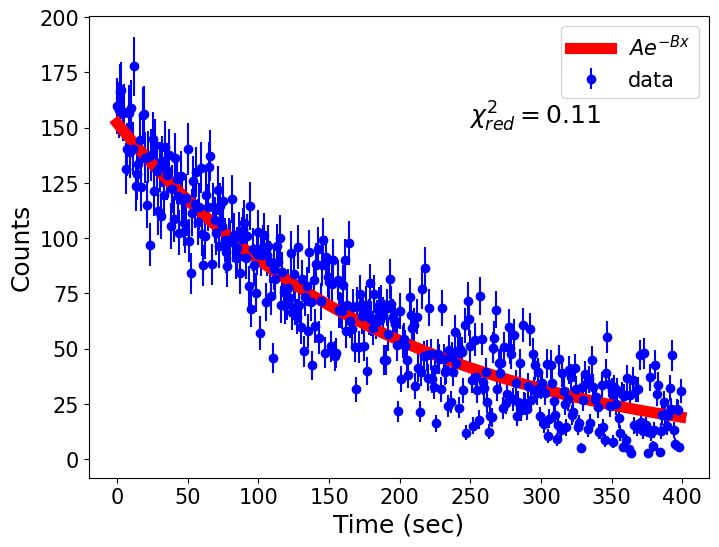

In [9]:
#let's plot the fit and the gaussian from the fitting routine in the same plot
fig, ax = plt.subplots(figsize=(8,6))  #I am creating a canvas for plotting
ax.errorbar(t, data, yerr=np.sqrt(data), fmt='o',  color='blue', label='data') #plotting the data with error bars
ax.plot(t,exp1(t,*popt),color='red',linewidth=8,label='$Ae^{-Bx}$')  #plotting the fit result
fig.text(0.6,0.7,"$\chi^{2}_{red} = %.2f$"%red_chi2,fontsize=18)                                               #Chi2 value
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel("Time (sec)", fontsize = 18)
plt.ylabel("Counts", fontsize = 18)


#Half lives calculation from the fitting parameters
Since the fit function $Ae^{-Bt}$ has been used so by comparison $\lambda = B$, therefore, $t_{1/2} = ln(2)/ B$

In [10]:
t12_f=( np.log(2) / (popt[1]) )
print("half life = ", t12_f)

half life =  133.0380469887486


In [11]:
t12_i - t12_f

5.591389123240475

# Exercise


*   Change the disintegration constant by a factor of 2 and calculate the difference betweeb the half-lives

      <details>
      <summary>Click me for a hint!</summary>

      lambda_ = 0.005 * 2

      </details>



*   What happens when you increase the noise by a factor of 2?
    <details>
      <summary>Click me for a hint!</summary>

      noise_sigma = 15 * 2

      </details>




